Check whether the zip file is in the working directory or not (Google Colab is slow, so please wait until the uploading is finished)

In [ ]:
!ls

OpenAImer.zip  sample_data


Unzip the file to get the folder contents

In [ ]:
!unzip OpenAImer.zip

Archive:  OpenAImer.zip
   creating: OpenAImer/test/
  inflating: OpenAImer/test/YehKarkeDikhaao100429.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao100887.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao101007.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao101074.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao101173.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao101379.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao101598.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao101677.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao102482.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao102654.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao102732.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao103371.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao103461.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao103674.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao103752.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao103985.jpg  
  inflating: OpenAImer/test/YehKarkeDikhaao104177.j

Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

Augmenting the data and splitting the dataset into training and validation dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.1)
training_set = train_datagen.flow_from_directory('OpenAImer/train',
                                                 target_size = (90, 90),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 seed=42,
                                                 subset="training")
validation_set = train_datagen.flow_from_directory('OpenAImer/train',
                                                 target_size = (90, 90),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 seed=42,
                                                 subset="validation")

Found 2740 images belonging to 7 classes.
Found 303 images belonging to 7 classes.


Buidling the model

In [ ]:
# load the architecture with imagenet weights as base
base_model = tf.keras.applications.DenseNet201(
					include_top=False,
					weights='imagenet',
					input_shape=(90,90,3)
					)

base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.

model = tf.keras.Sequential([
		base_model,
		tf.keras.layers.BatchNormalization(renorm=True),
		tf.keras.layers.GlobalAveragePooling2D(),
		tf.keras.layers.Dense(512, activation='relu'),
		tf.keras.layers.Dense(256, activation='relu'),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(7, activation='softmax')
	])


Compiling the model

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model

Early callback function to terminate the fit method if the accuracy doesn't increase significantly over a certain number of epochs

In [ ]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)
# early stopping call back

Training the model

In [ ]:
# fit model
history = model.fit(x = training_set,
					validation_data=validation_set,
					epochs=25,
					callbacks=[early])

Epoch 1/25
86/86 [==============================] - 135s 1s/step - loss: 0.6945 - accuracy: 0.7617 - val_loss: 0.3769 - val_accuracy: 0.8746
Epoch 2/25
86/86 [==============================] - 110s 1s/step - loss: 0.3263 - accuracy: 0.8748 - val_loss: 0.3097 - val_accuracy: 0.8878
Epoch 3/25
86/86 [==============================] - 121s 1s/step - loss: 0.2450 - accuracy: 0.9095 - val_loss: 0.2598 - val_accuracy: 0.9076
Epoch 4/25
86/86 [==============================] - 120s 1s/step - loss: 0.1745 - accuracy: 0.9387 - val_loss: 0.2251 - val_accuracy: 0.9142
Epoch 5/25
86/86 [==============================] - 111s 1s/step - loss: 0.1653 - accuracy: 0.9372 - val_loss: 0.2616 - val_accuracy: 0.9142
Epoch 6/25
86/86 [==============================] - 109s 1s/step - loss: 0.1569 - accuracy: 0.9507 - val_loss: 0.3292 - val_accuracy: 0.8977
Epoch 7/25
86/86 [==============================] - 122s 1s/step - loss: 0.1400 - accuracy: 0.9547 - val_loss: 0.2345 - val_accuracy: 0.9340
Epoch 8/25
86

Visualising the model's performance (tarining vs validation accuracy)

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy: 0.9835766553878784\nValidation Accuracy: 0.9240924119949341')

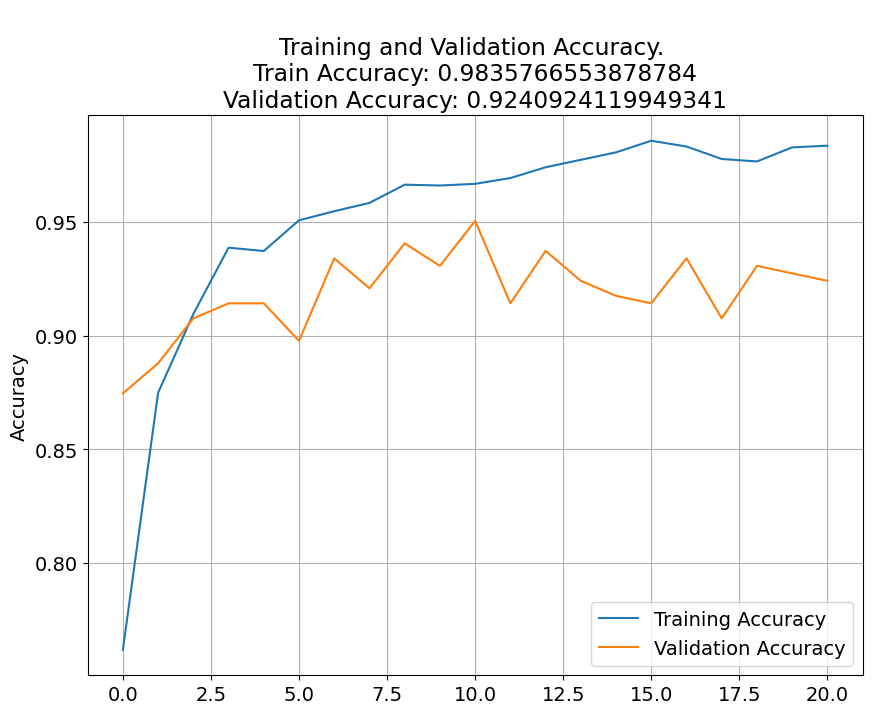

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

Visualising the model's performance (tarining vs validation loss)

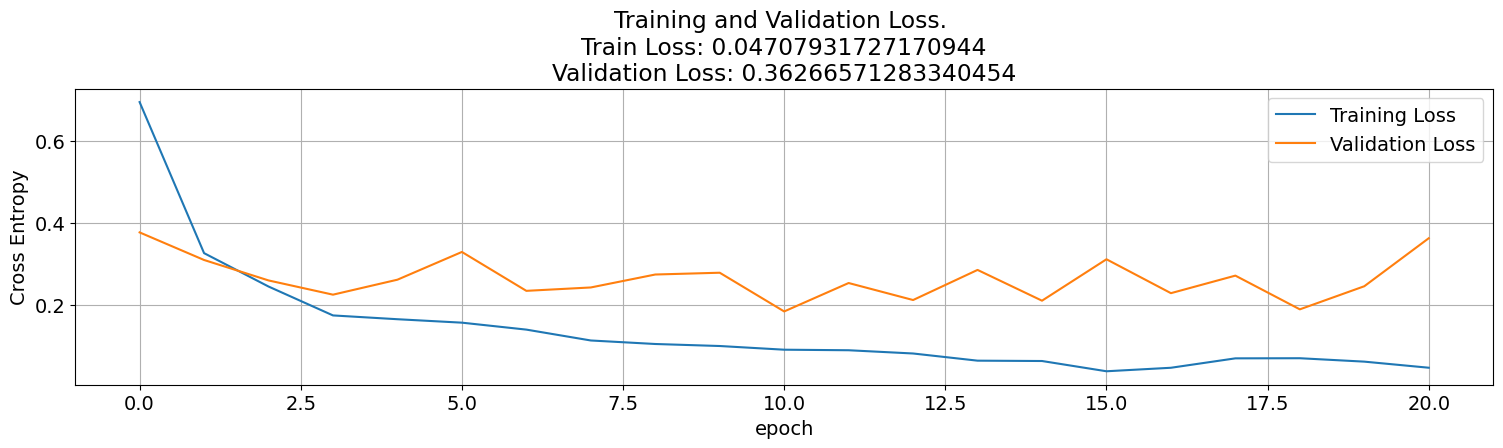

In [ ]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

Evaluating the accuracy of the model

In [ ]:
accuracy_score = model.evaluate(validation_set)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])


10/10 [==============================] - 11s 1s/step - loss: 0.2944 - accuracy: 0.9307
[0.29439079761505127, 0.9306930899620056]
Accuracy: 93.0693%
Loss:  0.29439079761505127


Making predictions on the test data

In [ ]:
# Dictionary mapping prediction indices to labels
label_map = {
    0: 'bus',
    1: 'car',
    2: 'cat',
    3: 'cricket',
    4: 'dog',
    5: 'football',
    6: 'product'
}

sample = pd.read_csv('sample_submission.csv')
predictions = []
index=0
for image in sample.id:
    img = tf.keras.preprocessing.image.load_img('OpenAImer/test/YehKarkeDikhaao'+str(image)+'.jpg')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (90, 90))
    img = tf.reshape(img, (-1, 90, 90, 3))
    prediction = model.predict(img/255)
    predicted_label_index = np.argmax(prediction)
    predicted_label = label_map[predicted_label_index]  # Mapping index to label
    predictions.append(predicted_label)
    print(index)
    index+=1

my_submission = pd.DataFrame({'id': sample.id, 'label': predictions})
my_submission.to_csv('submission.csv', index=False)

# Submission file output
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output

1/1 [==============================] - 4s 4s/step
0
1/1 [==============================] - 0s 79ms/step
1
1/1 [==============================] - 0s 83ms/step
2
1/1 [==============================] - 0s 77ms/step
3
1/1 [==============================] - 0s 81ms/step
4
1/1 [==============================] - 0s 77ms/step
5
1/1 [==============================] - 0s 122ms/step
6
1/1 [==============================] - 0s 117ms/step
7
1/1 [==============================] - 0s 132ms/step
8
1/1 [==============================] - 0s 122ms/step
9
1/1 [==============================] - 0s 110ms/step
10
1/1 [==============================] - 0s 134ms/step
11
1/1 [==============================] - 0s 123ms/step
12
1/1 [==============================] - 0s 131ms/step
13
1/1 [==============================] - 0s 130ms/step
14
1/1 [==============================] - 0s 80ms/step
15
1/1 [==============================] - 0s 77ms/step
16
1/1 [==============================] - 0s 76ms/step
17
1/1 [========